## Load and Find Missed Data

In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
import umap
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('MovieAssignmentData.csv')

# Fill missing values with the mean for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values with the most frequent value for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])


## Explore Data Set

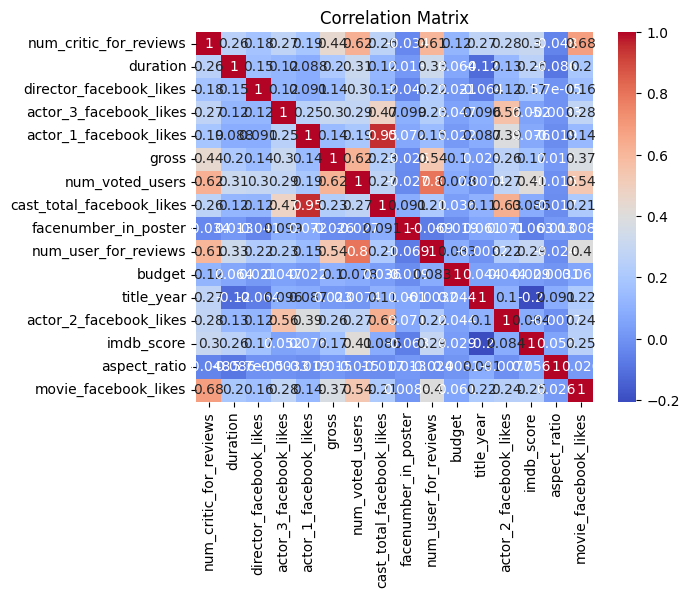

In [ ]:
# Explore dataset correlation for numeric columns only
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Dimensionality Reduction with PCA

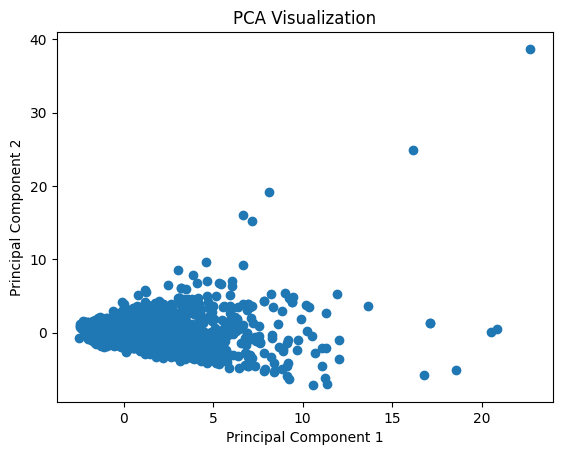

In [ ]:
# Create a pipeline for preprocessing
numeric_features = df[numeric_columns].columns
categorical_features = df[non_numeric_columns].columns

numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler()),  # Use StandardScaler for numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', OneHotEncoder(handle_unknown='ignore')),  # Use OneHotEncoder for categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
df_processed = preprocessor.fit_transform(df)


# Convert sparse matrix to dense matrix
dense_matrix = df_processed.toarray()

# Apply PCA to the dense data
pca_result = PCA(n_components=2).fit_transform(dense_matrix)

# Visualize the result
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

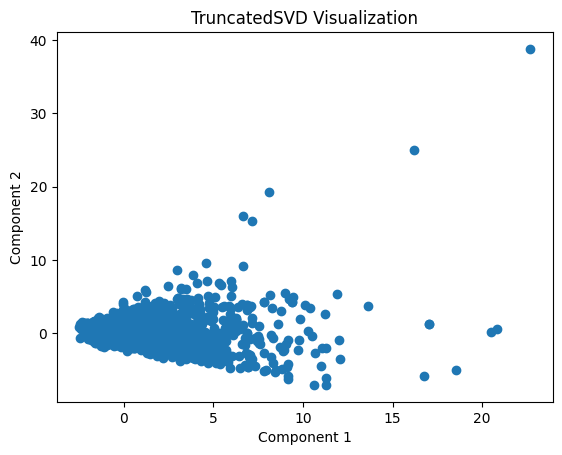

In [ ]:
# Apply TruncatedSVD to the processed numeric data
svd_result = TruncatedSVD(n_components=2).fit_transform(df_processed[:, :len(numeric_features)])

# Visualize the result
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('TruncatedSVD Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Dimensionality Reduction with UMAP

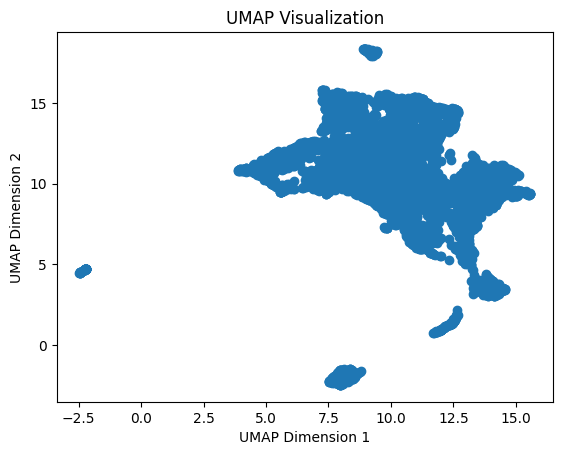

In [ ]:
# Dimensionality Reduction with UMAP
# Apply UMAP to the processed numeric data
umap_result = umap.UMAP(n_components=2).fit_transform(df_processed[:, :len(numeric_features)])

# Visualize the result
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

### Dimensionality Reduction with t-SNE

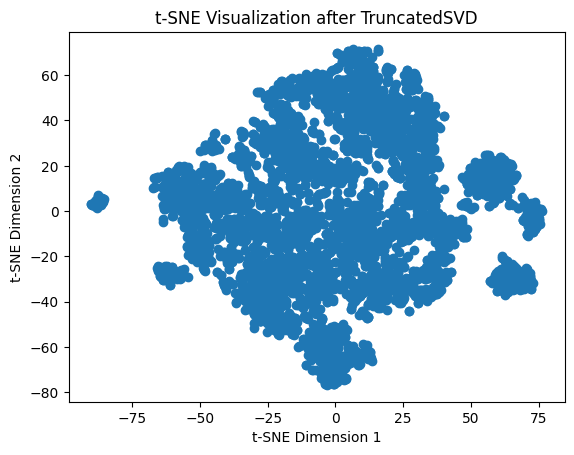

In [ ]:
# Apply TruncatedSVD to the processed data
svd_result = TruncatedSVD(n_components=50).fit_transform(df_processed)

# Apply t-SNE to the TruncatedSVD result
tsne_result = TSNE(n_components=2).fit_transform(svd_result)

# Visualize the result
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Visualization after TruncatedSVD')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### Train a Model

In [ ]:
# Apply preprocessing to the data
X = preprocessor.fit_transform(df)
y = df['imdb_score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluate Model

In [ ]:
# Evaluate the model on the validation set
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

Mean Squared Error on Validation Set: 7.881788004650341e-06


### Cross-Validation

In [ ]:
# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.99999458 0.99999538 0.99999449 0.99999438 0.99999205]


## Decision Tree
### Additional Experiment


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5)
print(f'Decision Tree Cross-Validation Scores: {tree_cv_scores}')


Decision Tree Cross-Validation Scores: [0.99997041 0.99993629 0.9997232  0.99997681 0.99993712]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
forest_model = RandomForestRegressor()
forest_cv_scores = cross_val_score(forest_model, X, y, cv=5)
print(f'Random Forest Cross-Validation Scores: {forest_cv_scores}')

Random Forest Cross-Validation Scores: [0.99996318 0.99992464 0.9997749  0.99998536 0.9999656 ]
